In [2]:
import math
import random
import matplotlib.pyplot as plt

## 1. Random Date Generator
### a. univariate gaussian data generator 
- INPUT: expectation value (m), variance (s)
- OUTPUT: one outcome ~ N(m, s)
- HINT: https://en.wikipedia.org/wiki/Normal_distribution#Generating_values_from_normal_distribution
- NOTE: you have to handcraft your geneartor based on one of the approaches given in the hint.

#### Using central limit theory method

In [3]:
def gaussianDataGenerator(mean, varience):
    res = 0.0
    for i in xrange(12):
        res += random.uniform(0, 1)
    res -= 6.0
    return res * math.sqrt(varience) + mean

#### test ouput

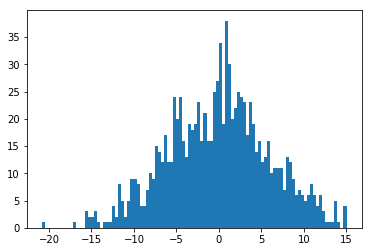

In [4]:
mean_1a = 0.0
varience_1a = 36.0

sample_num = 1000
normal_samples = []
for i in xrange(sample_num):
    sample = gaussianDataGenerator(mean_1a, varience_1a)
    normal_samples.append(sample)
    
plt.hist(normal_samples, bins=100)
plt.show()

### b. polynomial basis linear model (y = WTPhi(x)+e ; e ~ N(0, a)) data generator
- INPUT: basis number (n; ex. n=2 -> y = w0x0 +w1x1), a, w
- OUTPUT: y
- NOTE: there is an internal constraint: -10.0 < x < 10.0, x is uniformly distributed.

$$
y = W^T\psi(x) + \epsilon \quad;\quad\epsilon \sim \mathcal{N}(0,\ \sigma^2)\\
$$
$$
\Rightarrow y \sim \mathcal{N}(W^T\psi(x),\ \sigma^2)
$$

In [5]:
def linearModelDataGenerator(basis_num, varience, coefficient):
    assert basis_num == len(coefficient)
    
    x = random.uniform(-10.0, 10.0)
    psi = []
    for i in xrange(basis_num):
        psi.append(math.pow(x, i))
    
    mean = 0
    for i in xrange(basis_num):
        mean += psi[i] * coefficient[i]
        
    y = gaussianDataGenerator(mean, varience)
    
    return x, y

#### test output
Use quadratic formula (y = x^2)

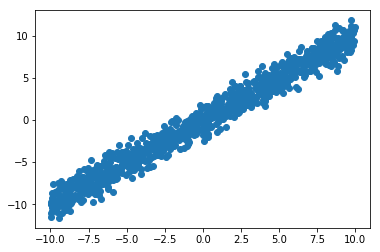

In [6]:
# y = x^2 + e
varience_1b = 1.0
w_1b = [0.0, 1.0]
sample_num = 1000

linear_model_sample = []
for i in xrange(sample_num):
    x, y = linearModelDataGenerator(len(w_1b), varience_1b, w_1b)
    linear_model_sample.append([x, y])
    
sample_x, sample_y = zip(*linear_model_sample)
plt.scatter(sample_x, sample_y)
plt.show()

## 2. Sequential estimate the mean and variance from the data given from the univariate gaussian data generator (1.a).
- NOTE: you should derive the recursive function of mean and variance based on the sequential esitmation. 
- INPUT: m, s as in (1.a)
- FUNCTION: call (1.a) to get a new data point from N(m, s), use sequential estimation to find the current estimates to m and s., repeat until the estimates converge.
- OUTPUT: print the new data point and the current estimiates of m and s in each iteration.
- HINT: https://en.wikipedia.org/wiki/Algorithms_for_calculating_variance#Online_algorithm

In [7]:
class sequentialEstimator:
    
    def __init__(self, mean, varience):
        self.estimated_mean = 0
        self.estimated_varience = 0
        self.mean = mean
        self.varience = varience
        
        self.count = 0
        self.threshold = 0.001
        self.data_list = []
        self.mean_list = []
        self.varience_list = []
        
    def run(self):
        while True:
            data_point = gaussianDataGenerator(self.mean, self.varience)
            self.estimate(data_point)
            str_data_point = "data point: %.5f" % (data_point)
            str_mean = "m: %.5f" % (self.estimated_mean)
            str_varience = "s: %.5f" % (self.estimated_varience)
            print "%-23s %-13s %-11s" % (str_data_point, str_mean, str_varience)
            # if abs(self.estimated_mean - self.mean) < self.threshold and abs(self.estimated_varience - self.varience) < math.pow(self.threshold, 2):
            if abs(self.estimated_mean - self.mean) < self.threshold:
                break
        
    def estimate(self, data_point):
        self.count += 1
        original_mean = self.estimated_mean
        self.estimated_mean += (data_point - self.estimated_mean) / self.count
        self.estimated_varience = ((self.count - 1) * self.estimated_varience + (data_point - original_mean) * (data_point - self.estimated_mean)) / self.count
        
        self.data_list.append(data_point)
        self.mean_list.append(self.estimated_mean)
        self.varience_list.append(self.estimated_varience)
        

#### test output

In [8]:
mean_2 = 0.0
varience_2 = 36.0

estimator = sequentialEstimator(mean_2, varience_2)
estimator.run()

data point: 15.26281    m: 15.26281   s: 0.00000 
data point: 5.30114     m: 10.28197   s: 24.80868
data point: -4.13491    m: 5.47635    s: 62.72726
data point: 1.04007     m: 4.36728    s: 50.73555
data point: -1.71495    m: 3.15083    s: 46.50739
data point: 2.75488     m: 3.08484    s: 38.77793
data point: 0.67111     m: 2.74002    s: 33.95163
data point: 2.52130     m: 2.71268    s: 29.71291
data point: -0.04437    m: 2.40634    s: 27.16222
data point: -5.39323    m: 1.62639    s: 29.92100
data point: -0.40181    m: 1.44200    s: 27.54087
data point: -13.67143   m: 0.18255    s: 42.69422
data point: -0.75161    m: 0.11069    s: 39.47202
data point: 6.70111     m: 0.58144    s: 39.53338
data point: -8.59227    m: -0.03014   s: 42.13426
data point: -6.54251    m: -0.43717   s: 41.98588
data point: -13.01144   m: -1.17683   s: 48.26976
data point: -6.80303    m: -1.48940   s: 47.24897
data point: 2.12177     m: -1.29934   s: 45.41240
data point: 5.25397     m: -0.97167   s: 45.18171


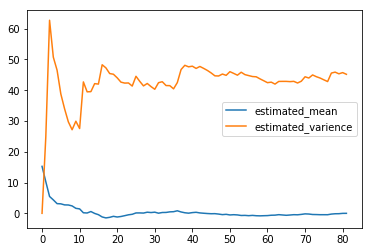

In [9]:
plt.plot(estimator.mean_list)
plt.plot(estimator.varience_list)
plt.legend(['estimated_mean', 'estimated_varience'], loc='center right')
plt.show()

## 3. Baysian Linear Regression
- INPUT: the precision (i.e., b) for initial prior w ~ N(0, b^(-1)I) and all other required inputs for the polynomial basis linear model geneartor (1.b)
- FUNCTION: call 1.b to generate one data point, and update the prior. and calculate the paramters of predictive distribution, repeat until the posterior probability converges.
- OUTPUT: print the new data point and the current paramters for posterior and predictive distribution.
- HINT: It is not that hard.

#### Polynomial Basis Linear Model:
$$
y_{i} \sim \mathcal{N}(w^Tx_{i},\ a^{-1})
$$

#### Initial Prior:
$$
w\sim\mathcal{N}(0,\ b^{-1}I)
$$

#### Data Setup:
$$
D = 
\begin{cases}
A = [\psi(x_{1})^T,\psi(x_{2})^T,\dots,\psi(x_{n})^T]^T\quad(design\ matrix)\\
y = [y_{1},y_{2},\dots,y_{n}]
\end{cases}
$$

#### Posterior:
$$
P(w\,|\,D) = \mathcal{N}(w\,|\,\mu,\, \Lambda^{-1})
\quad,\quad
\begin{cases}
\mu = a\Lambda^{-1}A^Ty\\
\Lambda = aA^TA+bI
\end{cases}
$$

#### Online Learning Posterior:
$$
P_{n}(w\,|\,x_{n}) = \mathcal{N}_{n}(\mu_{n},\,\Lambda_{n}^{-1})
\quad,\quad
\begin{cases}
\mu_{n} = \Lambda_{n}^{-1}(\Lambda_{n-1}\mu_{n-1}+aA^Ty)\\
\Lambda_{n} = aA^TA+\Lambda_{n-1}
\end{cases}
$$

#### Predictive Distribution:
$$
P(y \,|\, x, D) = \mathcal{N}(y \,|\, u, \frac{1}{\lambda})\quad,\quad
\begin{cases}
u = \mu^Tx\\
\frac{1}{\lambda} = \frac{1}{a} + x^T\Lambda^{-1}x
\end{cases}
$$

#### Cholesky Decomposition:
Precision Matrix and Covarience Matrix are positive definite, so it can be decomposed by Cholesky method.

$$\Lambda = LL^T$$
$$\Lambda^{-1} = (L^T)^{-1}L^{-1}$$
$$\Lambda^{-1} = (L^{-1})^TL^{-1}$$
$$x^T\Lambda^{-1}x = x^T(L^{-1})^TL^{-1}x$$
$$x^T\Lambda^{-1}x = (L^{-1}x)^T(L^{-1}x)$$


In [150]:
import numpy as np

class BaysianLinearRegressionModel:
    
    def __init__(self, basis_num, coefficient, a, b):
        assert basis_num == len(coefficient)
        
        self.n = basis_num
        self.coefficient = coefficient
        self.a = a
        self.prior_mean = [0.0 for i in xrange(self.n)]
        self.prior_precision = [[0.0 for j in xrange(self.n)] for i in xrange(self.n)]
        for i in xrange(self.n):
            self.prior_precision[i][i] = b
        
        self.count = 0
        self.threshold = 0.001
        self.data_list = []
        
        
    def run(self):
        
        while True:
            self.count += 1
            print "count:",
            print self.count
            
            data_x, data_y = linearModelDataGenerator(self.n, 1.0 / self.a, self.coefficient)
            self.data_list.append([data_x, data_y])
            print "data_point x: %.5f" % (data_x)
            print "data_point y: %.5f" % (data_y)
            
            print "linear model coefficient:"
            print "",
            print self.coefficient
            
            print "posterior",
            print "-"*39
            self.calcPosterior(data_x, data_y)
            
            print "predictive distribution",
            print "-"*25
            self.calcPredictiveDistribution(data_x, data_y)
            print "-"*48
            
            error = 0
            for i in xrange(self.n):
                error += math.pow(self.coefficient[i] - self.prior_mean[i], 2)
                
            print "error:",
            print error
            print "="*48
            
            if error < self.threshold:
                break
        
        
    def calcPosterior(self, data_x, data_y):
        
        A = [math.pow(data_x, i) for i in xrange(self.n)]
        
        # A^TA
        aATA = [[self.a*x*y for y in A] for x in A]
        
        # calculate precision
        precision = [[(aATA[i][j] + self.prior_precision[i][j]) for j in xrange(self.n)] for i in xrange(self.n)]
        
        # aA^Ty
        aATy = [self.a * data_y * x for x in A]
        
        # \Lambda_{n-1}\mu_{n-1} + A^Ty
        for i in xrange(self.n):
            for j in xrange(self.n):
                aATy[i] += self.prior_precision[i][j] * self.prior_mean[j]
        
        # solve mu 
        # LL^T mu = aA^Ty 
        L = self.choleskyDecomposition(precision, self.n)
        LT = self.transpose(L, self.n)
        mu = self.substitution(L, LT, aATy, self.n)
        
        print "mean:"
        print "",
        print ["%.5f"%(i) for i in mu]
        print "precision:"
        for row in precision:
            print "",
            print ["%.5f"%(i) for i in row]

        # use this posterior as next prior
        self.prior_precision = precision
        self.prior_mean = mu
        
        
    def calcPredictiveDistribution(self, data_x, data_y):
        x = [math.pow(data_x, i) for i in xrange(self.n)]
        
        u = 0
        for i in xrange(self.n):
            u += self.prior_mean[i] * x[i]
            
        Linverse = []
        L = self.choleskyDecomposition(self.prior_precision, self.n)
        
        # forward substitution to get inverse
        for i in xrange(self.n):
            b = [1.0 if i==j else 0.0 for j in xrange(self.n)]
            for i in xrange(self.n):
                for j in xrange(i-1, -1, -1):
                    b[i] -= L[i][j] * b[j]
                b[i] = b[i] / L[i][i]
            Linverse.append(b)
        Linverse = self.transpose(Linverse, self.n)
        
        # L^{-1}x
        Lx = [0.0 for i in xrange(self.n)]
        for i in xrange(self.n):
            for j in xrange(self.n):
                Lx[i] += Linverse[i][j] * x[j]
        
        v = 1.0 / self.a
        for i in xrange(self.n):
            v += Lx[i] * Lx[i]
        
        print "mean:",
        print u
        print "varience:",
        print v
        
    
    def transpose(self, A, n):
        AT = A
        for i in xrange(n):
            for j in xrange(n):
                AT[i][j] = A[j][i] 
                
        return AT
        
        
    def choleskyDecomposition(self, A, n):
        L = [[0.0 for j in xrange(n)] for i in xrange(n)]
        
        for i in xrange(n):
            for j in xrange(i+1):
                s = 0.0
                for k in xrange(j):
                    s += L[i][k] * L[j][k]
                if i == j :
                    L[i][j] = math.sqrt(A[i][j] - s)
                else : 
                    L[i][j] = (1.0 / L[j][j]) * (A[i][j] - s)

        return L
    
    
    def substitution(self, L, U, b, n):    
        x = b
        for i in xrange(n):
            for j in xrange(i-1, -1, -1):
                x[i] -= L[i][j] * x[j]
            x[i] = x[i] / L[i][i]

        for i in xrange(n-1, -1, -1):
            for j in xrange(i+1, n):
                x[i] -= U[i][j] * x[j]
            x[i] = x[i] / U[i][i]
            
        return x
    

count: 1
data_point x: 3.45956
data_point y: -42.45059
linear model coefficient:
 [0.0, 13.0, 10.0, -5.0]
posterior ---------------------------------------
mean:
 ['-0.02268', '-0.07847', '-0.27145', '-0.93911']
precision:
 ['2.00000', '3.45956', '11.96855', '41.40590']
 ['3.45956', '12.96855', '41.40590', '143.24617']
 ['11.96855', '41.40590', '144.24617', '495.56861']
 ['41.40590', '143.24617', '495.56861', '1715.44889']
predictive distribution -------------------------
159.950191902
mean: -42.4279061718
varience: [[ 1.99946572]]
159.950191902
------------------------------------------------
error: 293.040344278
count: 2
data_point x: 9.60785
data_point y: -3385.33092
linear model coefficient:
 [0.0, 13.0, 10.0, -5.0]
posterior ---------------------------------------
mean:
 ['1.63567', '5.12845', '12.64777', '-5.19070']
precision:
 ['3.00000', '13.06741', '104.27935', '928.31437']
 ['13.06741', '105.27935', '928.31437', '8664.53072']
 ['104.27935', '928.31437', '8665.53072', '82366.8

count: 28
data_point x: 3.72976
data_point y: -71.24534
linear model coefficient:
 [0.0, 13.0, 10.0, -5.0]
posterior ---------------------------------------
mean:
 ['0.37471', '12.90203', '9.99579', '-4.99790']
precision:
 ['29.00000', '44.55258', '1101.66428', '2835.24852']
 ['44.55258', '1102.66428', '2835.24852', '65406.60747']
 ['1101.66428', '2835.24852', '65407.60747', '222133.47319']
 ['2835.24852', '65406.60747', '222133.47319', '4674760.31175']
predictive distribution -------------------------
1.06048875679
mean: -71.7679325533
varience: [[ 1.09120281]]
1.06048875679
------------------------------------------------
error: 0.150026464246
count: 29
data_point x: 1.93884
data_point y: 26.47067
linear model coefficient:
 [0.0, 13.0, 10.0, -5.0]
posterior ---------------------------------------
mean:
 ['0.36933', '12.90169', '9.99588', '-4.99790']
precision:
 ['30.00000', '46.49143', '1105.42340', '2842.53686']
 ['46.49143', '1106.42340', '2842.53686', '65420.73843']
 ['1105.42340'

1.05994997336
------------------------------------------------
error: 0.0205493960646
count: 52
data_point x: -5.30373
data_point y: 957.40995
linear model coefficient:
 [0.0, 13.0, 10.0, -5.0]
posterior ---------------------------------------
mean:
 ['0.11129', '12.96497', '10.00256', '-4.99899']
precision:
 ['53.00000', '12.16387', '1841.53111', '1596.47556']
 ['12.16387', '1842.53111', '1596.47556', '112836.01867']
 ['1841.53111', '1596.47556', '112837.01867', '135537.56120']
 ['1596.47556', '112836.01867', '135537.56120', '8325230.22737']
predictive distribution -------------------------
1.06650558395
mean: 958.521143855
varience: [[ 1.05387529]]
1.06650558395
------------------------------------------------
error: 0.0136194288396
count: 53
data_point x: -6.64770
data_point y: 1824.39956
linear model coefficient:
 [0.0, 13.0, 10.0, -5.0]
posterior ---------------------------------------
mean:
 ['0.11018', '12.96595', '10.00252', '-4.99899']
precision:
 ['54.00000', '5.51617', '1885

count: 80
data_point x: 3.66602
data_point y: -64.26866
linear model coefficient:
 [0.0, 13.0, 10.0, -5.0]
posterior ---------------------------------------
mean:
 ['0.23305', '13.00333', '9.99969', '-4.99938']
precision:
 ['81.00000', '-29.38872', '2624.21012', '-2037.48406']
 ['-29.38872', '2625.21012', '-2037.48406', '154060.51706']
 ['2624.21012', '-2037.48406', '154061.51706', '-153064.99815']
 ['-2037.48406', '154060.51706', '-153064.99815', '11115845.46718']
predictive distribution -------------------------
1.02129453791
mean: -64.0238066889
varience: [[ 1.03653017]]
1.02129453791
------------------------------------------------
error: 0.0543221056978
count: 81
data_point x: -4.70202
data_point y: 680.77809
linear model coefficient:
 [0.0, 13.0, 10.0, -5.0]
posterior ---------------------------------------
mean:
 ['0.24742', '12.99770', '9.99957', '-4.99931']
precision:
 ['82.00000', '-34.09074', '2646.31909', '-2141.44079']
 ['-34.09074', '2647.31909', '-2141.44079', '154549.32

 ['-3843.03544', '207406.88390', '-282929.90067', '15044015.07807']
predictive distribution -------------------------
1.4787272173
mean: -3695.89136269
varience: [[ 1.15648625]]
1.4787272173
------------------------------------------------
error: 0.0813763268977
count: 108
data_point x: -2.97743
data_point y: 181.43099
linear model coefficient:
 [0.0, 13.0, 10.0, -5.0]
posterior ---------------------------------------
mean:
 ['0.27327', '13.02279', '9.99763', '-4.99993']
precision:
 ['109.00000', '-61.92407', '3500.84352', '-3869.43071']
 ['-61.92407', '3501.84352', '-3869.43071', '207485.47407']
 ['3500.84352', '-3869.43071', '207486.47407', '-283163.89763']
 ['-3869.43071', '207485.47407', '-283163.89763', '15044711.78843']
predictive distribution -------------------------
1.01282289529
mean: 182.10329385
varience: [[ 1.02438679]]
1.01282289529
------------------------------------------------
error: 0.0752002019273
count: 109
data_point x: -2.34789
data_point y: 90.09498
linear model

posterior ---------------------------------------
mean:
 ['0.20876', '12.98809', '9.99710', '-4.99968']
precision:
 ['135.00000', '-50.98336', '4283.41033', '-2876.65231']
 ['-50.98336', '4284.41033', '-2876.65231', '251327.26513']
 ['4283.41033', '-2876.65231', '251328.26513', '-213491.47743']
 ['-2876.65231', '251327.26513', '-213491.47743', '17998955.48276']
predictive distribution -------------------------
1.04714234337
mean: 1503.4054543
varience: [[ 1.02052939]]
1.04714234337
------------------------------------------------
error: 0.0437295239596
count: 135
data_point x: -9.10930
data_point y: 4490.21426
linear model coefficient:
 [0.0, 13.0, 10.0, -5.0]
posterior ---------------------------------------
mean:
 ['0.21101', '12.98743', '9.99695', '-4.99966']
precision:
 ['136.00000', '-60.09266', '4366.38962', '-3632.53529']
 ['-60.09266', '4367.38962', '-3632.53529', '258212.82752']
 ['4366.38962', '-3632.53529', '258213.82752', '-276214.10918']
 ['-3632.53529', '258212.82752', '-

 ['0.11938', '12.99394', '9.99863', '-4.99974']
precision:
 ['162.00000', '-73.21815', '5002.91066', '-3727.91512']
 ['-73.21815', '5003.91066', '-3727.91512', '289746.66010']
 ['5002.91066', '-3727.91512', '289747.66010', '-275758.48963']
 ['-3727.91512', '289746.66010', '-275758.48963', '20771682.25844']
predictive distribution -------------------------
1.01857394754
mean: -279.001035157
varience: [[ 1.01967998]]
1.01857394754
------------------------------------------------
error: 0.0142908923585
count: 162
data_point x: -7.59734
data_point y: 2670.62186
linear model coefficient:
 [0.0, 13.0, 10.0, -5.0]
posterior ---------------------------------------
mean:
 ['0.11945', '12.99449', '9.99857', '-4.99974']
precision:
 ['163.00000', '-80.81549', '5060.63024', '-4166.43037']
 ['-80.81549', '5061.63024', '-4166.43037', '293078.20957']
 ['5060.63024', '-4166.43037', '293079.20957', '-301069.40398']
 ['-4166.43037', '293078.20957', '-301069.40398', '20963977.88235']
predictive distributi

linear model coefficient:
 [0.0, 13.0, 10.0, -5.0]
posterior ---------------------------------------
mean:
 ['0.10503', '12.98559', '9.99769', '-4.99966']
precision:
 ['188.00000', '-88.10277', '5744.56128', '-4892.73061']
 ['-88.10277', '5745.56128', '-4892.73061', '324247.04167']
 ['5744.56128', '-4892.73061', '324248.04167', '-347915.48867']
 ['-4892.73061', '324247.04167', '-347915.48867', '22782485.87393']
predictive distribution -------------------------
1.21639231187
mean: 4763.29264127
varience: [[ 1.05204697]]
1.21639231187
------------------------------------------------
error: 0.0112437205078
count: 188
data_point x: -6.52150
data_point y: 1729.82093
linear model coefficient:
 [0.0, 13.0, 10.0, -5.0]
posterior ---------------------------------------
mean:
 ['0.11120', '12.98007', '9.99788', '-4.99961']
precision:
 ['189.00000', '-94.62426', '5787.09123', '-5170.08967']
 ['-94.62426', '5788.09123', '-5170.08967', '326055.83852']
 ['5787.09123', '-5170.08967', '326056.83852', 

 ['0.07657', '12.96046', '9.99988', '-4.99924']
precision:
 ['215.00000', '-87.62558', '6596.16536', '-4828.23401']
 ['-87.62558', '6597.16536', '-4828.23401', '375898.02186']
 ['6596.16536', '-4828.23401', '375899.02186', '-327969.31155']
 ['-4828.23401', '375898.02186', '-327969.31155', '26623345.94999']
predictive distribution -------------------------
1.00551146495
mean: 69.5110108675
varience: [[ 1.01127247]]
1.00551146495
------------------------------------------------
error: 0.00742648332864
count: 215
data_point x: 8.57170
data_point y: -2302.85791
linear model coefficient:
 [0.0, 13.0, 10.0, -5.0]
posterior ---------------------------------------
mean:
 ['0.07735', '12.96052', '9.99981', '-4.99925']
precision:
 ['216.00000', '-79.05388', '6669.63935', '-4198.43731']
 ['-79.05388', '6670.63935', '-4198.43731', '381296.44812']
 ['6669.63935', '-4198.43731', '381297.44812', '-281695.63918']
 ['-4198.43731', '381296.44812', '-281695.63918', '27019989.83282']
predictive distributi

1.00583585034
mean: 181.45613562
varience: [[ 1.01086461]]
1.00583585034
------------------------------------------------
error: 0.00500135152516
count: 242
data_point x: -0.43171
data_point y: -1.27236
linear model coefficient:
 [0.0, 13.0, 10.0, -5.0]
posterior ---------------------------------------
mean:
 ['0.07644', '12.96063', '10.00021', '-4.99937']
precision:
 ['243.00000', '-117.36254', '7457.86540', '-7537.78656']
 ['-117.36254', '7458.86540', '-7537.78656', '431214.35046']
 ['7457.86540', '-7537.78656', '431215.35046', '-556949.54199']
 ['-7537.78656', '431214.35046', '-556949.54199', '30927682.65499']
predictive distribution -------------------------
1.0041405787
mean: -3.25276800191
varience: [[ 1.00878294]]
1.0041405787
------------------------------------------------
error: 0.00739363760775
count: 243
data_point x: 8.63530
data_point y: -2361.80969
linear model coefficient:
 [0.0, 13.0, 10.0, -5.0]
posterior ---------------------------------------
mean:
 ['0.07735', '12.

data_point x: 8.73480
data_point y: -2455.06147
linear model coefficient:
 [0.0, 13.0, 10.0, -5.0]
posterior ---------------------------------------
mean:
 ['0.04148', '12.96501', '10.00064', '-4.99955']
precision:
 ['270.00000', '-98.99667', '8791.63658', '-6915.89656']
 ['-98.99667', '8792.63658', '-6915.89656', '524808.75589']
 ['8791.63658', '-6915.89656', '524809.75589', '-538652.98856']
 ['-6915.89656', '524808.75589', '-538652.98856', '38197719.19251']
predictive distribution -------------------------
1.10198135833
mean: -2455.58176029
varience: [[ 1.02684011]]
1.10198135833
------------------------------------------------
error: 0.00294553343302
count: 270
data_point x: 2.53346
data_point y: 16.82173
linear model coefficient:
 [0.0, 13.0, 10.0, -5.0]
posterior ---------------------------------------
mean:
 ['0.04914', '12.96657', '10.00052', '-4.99957']
precision:
 ['271.00000', '-96.46321', '8798.05501', '-6899.63570']
 ['-96.46321', '8799.05501', '-6899.63570', '524849.95215'

 ['0.02010', '12.96670', '10.00025', '-4.99964']
precision:
 ['297.00000', '-46.12057', '9533.69710', '-3075.11834']
 ['-46.12057', '9534.69710', '-3075.11834', '565519.86595']
 ['9533.69710', '-3075.11834', '565520.86595', '-250851.45944']
 ['-3075.11834', '565519.86595', '-250851.45944', '41041104.02452']
predictive distribution -------------------------
1.16004626604
mean: -3515.84873102
varience: [[ 1.04633925]]
1.16004626604
------------------------------------------------
error: 0.00151283754428
count: 297
data_point x: -1.85351
data_point y: 40.45884
linear model coefficient:
 [0.0, 13.0, 10.0, -5.0]
posterior ---------------------------------------
mean:
 ['0.00843', '12.96837', '10.00044', '-4.99967']
precision:
 ['298.00000', '-47.97408', '9537.13261', '-3081.48611']
 ['-47.97408', '9538.13261', '-3081.48611', '565531.66868']
 ['9537.13261', '-3081.48611', '565532.66868', '-250873.33598']
 ['-3081.48611', '565531.66868', '-250873.33598', '41041144.57297']
predictive distribut

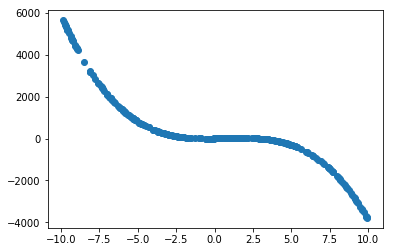

In [151]:
w_3 = [0.0, 13.0, 10.0, -5.0]
a_3 = 1
b_3 = 1

model = BaysianLinearRegressionModel(len(w_3), w_3, a_3, b_3)
model.run()

sample_x, sample_y = zip(*model.data_list)
plt.scatter(sample_x, sample_y)
plt.show()